In [92]:
#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression


In [93]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [94]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [95]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [96]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [97]:
#Replacement of Text classifiers to ordinal or binary for the following

for dataset in combine:
    dataset['Street'] = dataset['Street'].map({"Grvl": 0, "Pave":1})
    dataset['Alley'] = dataset['Alley'].map({'NA':0,'Grvl':1,'Pave':2})
    dataset['LotShape'] = dataset['LotShape'].map({'Reg':0,'IRl':1,'IR2':2,'IR3':3})
    dataset['LandContour'] = dataset['LandContour'].map({'Lvl':0,'Bnk':1,'HLS':2,'Low':3})
    dataset['Utilities'] = dataset['Utilities'].map({'AllPub':0,'NoSewr':1,'NoSewa':2,'ELO':3})
    dataset['LotConfig'] = dataset['LotConfig'].map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})
    dataset['LandSlope'] = dataset['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
    dataset['ExterQual'] = dataset['ExterQual'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4})
    dataset['ExterCond'] = dataset['ExterCond'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4})
    dataset['BsmtQual'] = dataset['BsmtQual'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5})
    dataset['BsmtCond'] = dataset['BsmtCond'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5})
    dataset['BsmtExposure'] = dataset['BsmtExposure'].map({'Gd':0,'Av':1,'Mn':2,'No':3,'NA':4})
    dataset['BsmtFinType1'] = dataset['BsmtFinType1'].map({'GLQ':0,'ALQ':1,'BLG':2,'Rec':3,'LwQ':4,'Unf':5,'NA':6})
    dataset['BsmtFinType2'] = dataset['BsmtFinType2'].map({'GLQ':0,'ALQ':1,'BLG':2,'Rec':3,'LwQ':4,'Unf':5,'NA':6})
    dataset['Heating'] = dataset['Heating'].map({'Floor':0,'GasA':1,'GasW':2,'Grav':3,'OthW':4,'Wall':5})
    dataset['HeatingQC'] = dataset['HeatingQC'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Pa':4})
    dataset['CentralAir'] = dataset['CentralAir'].map({'N':0,'Y':1})
    dataset['Electrical'] = dataset['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2,'FuseP':3,'Mix':4})
    dataset['KitchenQual'] = dataset['KitchenQual'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4})
    dataset['Functional'] = dataset['Functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})
    dataset['KitchenQual'] = dataset['KitchenQual'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4})


In [98]:
#Replacement of Text classifiers to ordinal or binary for the following
for dataset in combine: 
    dataset['HasPool']=dataset['PoolArea'] 
    dataset['HasBasement'] = dataset['TotalBsmtSF'] 
    dataset['Has2ndFl'] = dataset['2ndFlrSF']
for dataset in combine: 
    dataset.loc[dataset.HasPool>0,'HasPool']=1 
    dataset.loc[dataset.HasBasement>0,'HasBasement']=1
    dataset.loc[dataset.Has2ndFl>0,'Has2ndFl']=1

In [99]:

#New Simple Features with Addition of Multiple Feidsd
for dataset in combine: 
    dataset['totalRoomPlusBaths']=dataset['BsmtFullBath']+ dataset['BsmtHalfBath']\
    +dataset['FullBath']+dataset['HalfBath']

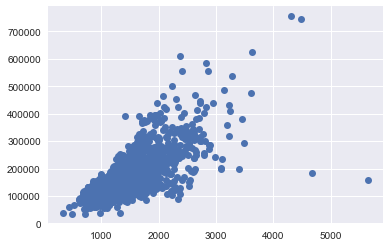

In [100]:
#Initial Visualizations

plt.plot(train_df['GrLivArea'],train_df['SalePrice'],'o')
#Definitely an upper limit on price per squarefoot that the market is willing to pay